## Programming Assignment I - Ioannis Mystakidis (sdi1600113), Ioanna Karageorgou (sdi1600057)

### Exercise 1: 
##### Implement an algorithm that takes as input three points in the plane, checks if they form a triangle and whether the interior of the triangle contains the origin (0, 0) or not.


##### Solution:
**Existence of a triangle**

A triangle with three given positive side lengths exists (i.e. is formed by these 3 points) if and only if those side lengths satisfy the **Triangle Inequality**, which states that the sum of the lengths of any two sides of a triangle must be greater than or equal to the length of the third side:
$$
AB + BC > CA\\
AB + CA > BC\\
BC + CA > AB\\
$$
The lengths of the sides of the triangle, are specified by the distances between the points. In analytic geometry -Euclidean Plane/Space-, the distance between *two* points of the xy-plane can be found using the **Euclidean Distance** formula, which can be easily derived by the Pythagorean Theorem. The distance between $(x_1, y_1)$ and $(x_2, y_2)$ is given by:
$$
d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}
$$

**Checking whether a point lies inside a triangle**

Supposing the coordinates $A=(x_1, y_1)$, $B=(x_2, y_2)$, $C=(x_3, y_3)$ do form a triangle *"like"* the following: <br/>
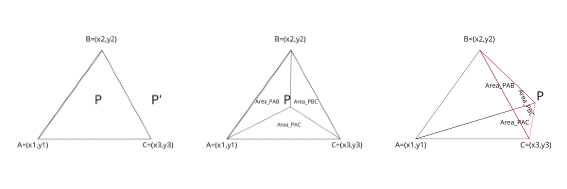

to check if a point (P) lies inside triangle ABC (or outside, P') we:
* Calculate the area of the given triangle ABC, using the formula: $$Area_{ABC} = \frac{x_1(y_2–y_3) + x_2(y_3–y_1) + x_3(y_1-y_2)}{2}$$ or using Heron's formula (if we've already calculated the lengths of the sides of the triangle): $$ Area_{ABC} = \sqrt{s(s-AB)(s-BC)(s-CA)}$$ where $s=\frac{AB+BC+CA}{2}$ is half the perimeter (semiperimeter)
* Calculate the area of the triangle PAB (the same way)
* Calculate the area of the triangle PBC (the same way)
* Calculate the area of the triangle PAC (the same way)
* If $Area_{PAB}$ + $Area_{PBC}$ + $Area_{PAC}$ is equal to $Area_{ABC}$, then P lies inside the triangle

The figures above show us *in an intuitive way* that when P lies inside the triangle (or possibly on its boundary) $Area_{PAB}$ + $Area_{PBC}$ + $Area_{PAC}$ is always going to be equal to $Area_{ABC}$, whereas when it lies outside, $Area_{PAB}$ + $Area_{PBC}$ + $Area_{PAC}$ is always bigger than $Area_{ABC}$

**Pseudocode**

*Algorithm*: Is_Valid_Triangle_and_Is_Origin_Inside(A,B,C) <br/> 
Input: Three points $A=(x_1, y_1)$, $B=(x_2, y_2)$, $C=(x_3, y_3)$ <br/> 
Output: Yes or No statements for whether the points form a triangle and whether the origin (0,0) lies inside the triangle

1. &emsp;Calculate sides AB, BC, CA formed by points A,B and C
2. &emsp;**if** AB+BC>CA and AB+CA>BC and BC+CA>AB **then**
3. &emsp;&emsp;print("Points form a triangle")
4. &emsp;&emsp;Calculate area of triangle ABC
5. &emsp;&emsp;Calculate areas of the three triangles (PAB,PBC,PAC) formed by our starting points and the origin P (0,0)
6. &emsp;&emsp;**if** $Area_{PAB}$ + $Area_{PBC}$ + $Area_{PAC}$ == $Area_{ABC}$ **then**
7. &emsp;&emsp;&emsp;print("Origin inside triangle")
8. &emsp;&emsp;**else**
9. &emsp;&emsp;&emsp;print("Origin not inside triangle")
10. &emsp;&emsp;Plot the triangle and the origin
11. &emsp;**else**
12. &emsp;&emsp;print("Points don't form a triangle")

**Comments on Steps**

(1) Using the Euclidean Distance formula <br/>
(2) If the *triangle inequality* holds then the points do form a valid triangle <br/>
(4) We used the first formula we mentioned (not Heron's formula) <br/>
(5) As shown in the figures above, our three starting points and the origin (P) form three new triangles. We don't need to calculate the sides
of these triangles, we can calculate their areas from their points (as in $step_4$) <br/>
(6) If the sum of those three areas is equal to the area of triangleABC then the origin lies inside triangleABC

<span style="color:red">NOTE! </span> In $step_6$, in order to avoid precision issues due to the comparison of floating point numbers by equality we can just modify the code to check for the inequality $Area_{PAB}$ + $Area_{PBC}$ + $Area_{PAC}$ > $Area_{ABC}$ instead and return *false* if it holds and *true* otherwise

In [0]:
import math
import ast
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [0]:
class Triangle:
    def __init__(self, pointA, pointB, pointC): #We'll save points as tuples. To refer to A.x and A.y coordinates will use pointA[0] and pointA[1] respectively
        self.pointA = pointA
        self.pointB = pointB
        self.pointC = pointC

    def calculate_side(self,point1,point2): #calculates the length of the side that is formed between the two points using the Euclidean formula
        return math.sqrt( (point2[0]-point1[0])**2 + (point2[1]-point1[1])**2 )

    def is_valid(self): #checks if the three points form a (valid) triangle or not
        sideAB = self.calculate_side(self.pointA,self.pointB)
        sideBC = self.calculate_side(self.pointB,self.pointC)
        sideCA = self.calculate_side(self.pointC,self.pointA)
        print("SidesOfABC = (%.3f,%.3f,%.3f)" % (sideAB,sideBC,sideCA))
        return ((sideAB+sideBC)>sideCA) and ((sideAB+sideCA)>sideBC) and ((sideBC+sideCA)>sideAB) #true if all three are true

    def calculate_area(self): #calculates the area of the triangle
        return abs(((self.pointA[0]*(self.pointB[1]-self.pointC[1]) #x1*(y2-y3)
                        +(self.pointB[0]*(self.pointC[1]-self.pointA[1])) #x2*(y3-y1)
                        +(self.pointC[0]*(self.pointA[1]-self.pointB[1])))))/2 #x3*(y1-y2)

    def is_point_inside(self, pointP): #checks if the point is inside triangleABC by comparing its area with the sum of the areas of the three triangles formed with the new point (P)
        trianglePAB = Triangle(pointP, self.pointA, self.pointB)
        trianglePBC = Triangle(pointP, self.pointB, self.pointC)
        trianglePAC = Triangle(pointP, self.pointA, self.pointC)
        areaABC = self.calculate_area()
        areaPAB_PBC_PAC = trianglePAB.calculate_area()+trianglePBC.calculate_area()+trianglePAC.calculate_area()
        print("AreaABC = %.7f - AreaPAB_PBC_PAC = %.7f" % (areaABC,areaPAB_PBC_PAC))
        return areaPAB_PBC_PAC == areaABC

    def plot(self, pointP):
        points = np.array([[self.pointA[0],self.pointA[1]],[self.pointB[0],self.pointB[1]], [self.pointC[0],self.pointC[1]]])
        polygon = Polygon(points, closed=False)
        ax = plt.gca()
        ax.add_patch(polygon)
        ax.axis('auto') #autoscale the x,y axes
        plt.scatter(pointP[0],pointP[1],c='black',alpha=0) #add the point, but make it transparent (alpha=0), we need to plot the point in order for the plot to 'autoscale' and include the point as well -the annotation below alone won't be included if it is out of the bounds-
        plt.annotate(s='P',xy=(pointP[0],pointP[1]),fontsize='16') #annotate the point with a 'P'
        plt.show()
        return

    def get_points(self):
        return [self.pointA,self.pointB,self.pointC] #return a list of the points


def get_input():
    print('The input points should be in the form (x1,y1),(x2,y2),...(xn,yn) with the parentheses included! -works with floating point coordinates as well-')
    points = ast.literal_eval(input('Enter all the points at once:')) #get the 3 points input as a whole string and evaluate it to 3 tuples
    return Triangle(points[0], points[1], points[2]) #create the triangle instance and return it


def main():
    try:
        triangleABC = get_input()
    except:
        print("Error while creating the Triangle instance! An example of input would be: '(1,5.2),(-2,-19),(5,3.2643)' - without the quotation marks")
    if (triangleABC.is_valid()):
        print("->Points %s form a valid triangle!" % triangleABC.get_points())
        pointP = (0,0) #origin
        if triangleABC.is_point_inside(pointP) == True:
            print ("->Point P(0,0) is inside triangleABC!")
        else:
            print ("->Point P(0,0) is NOT inside triangleABC!")
        triangleABC.plot(pointP)
    else:
        print("->Points %s DON'T form a valid triangle!" % triangleABC.get_points())

if __name__ == "__main__":
    main()

### Exercise 2: 
##### Given a circle of radius r in the plane with (0, 0) as center, implement an algorithm that finds the total lattice points on the circumference. Lattice Points are points with integer coordinates.


##### Solution:
**The Circle**<br/>
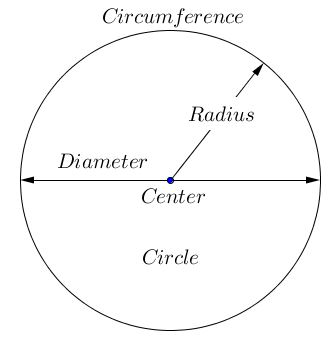 <br/>
A circle is the set of points in a plane that are equidistant from a given point $O$. The distance $r$ from the center is called the **radius**, and the point $O$ is called the **center**. Twice the radius is known as the **diameter** $d=2r$. The perimeter $C$ of a circle is called the **circumference**, and is given by $C=\pi d=2\pi r$, where $\pi$ is the circumference-to-diameter ratio $C/d$. The **area** of a circle is calculated by $A=\pi r^2$

**Equation of a Circle**

In the **Cartesian Coordinate System**, the circle with centre coordinates $(a, b)$ and radius $r$ is the set of all points $(x, y)$ such that:

$(x-a)^2+(y-b)^2=r^2$ <br/>

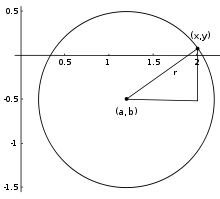<br/>

This equation, known as the Equation of the Circle, follows from the Pythagorean theorem applied to **any** point **on** the circle: <br/>As shown in the diagram, the radius $r$ is the hypotenuse of a right-angled triangle whose other sides are of length $|x − a|$ and $|y − b|$. If the circle is centred at the origin (0, 0), then the equation simplifies to: <br/>

$x^2+y^2=r^2$

So we know that for **all** points the on the circle (meaning on the boundary/circumference, this is considered the circle, not the interior) this equation must be satisfied. There's an infinite number of such points. However, not all of the them have integer coordinates (Duh!)

**Lattice Points**

Lattice Points are simply points with **integer coordinates** <br/>

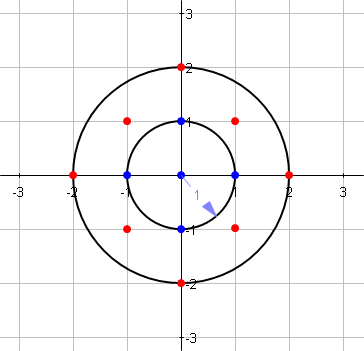<br/>

In the above figure, all the points (blue and red) have integer coordinates, but, in this exercise, we're only concerned with the ones on the **circumference** of the circle <br/>
To find those, we basically have to find values of $(x,y)$ that satisfy the equation $x^2 + y^2 = r^2$, since our center is $(0,0)$ <br/>
There is a symmetry here though. For any value of $(x, y)$ that satisfies the above equation we actually have a total of 4 different combinations of that point that satisfy the equation. This is because when $(x, y)$ satisfies the equation, so do $(x,-y),(-x,y),(-x,-y)$. For example, if we have a circle with radius $r=5$, center $(0,0)$ and a lattice point $(3,4)$, then points $(3,-4),(-3,4),(-3,-4)$ are also lattice points on the circle's circumference, because they all satisfy the equation (negation doesn't change anything because we square and add the two numbers) and they are all integers of course. When either $x$ or $y$ is 0, we only have 2 combinations of that point that satisfy the equation, because there is no negative 0. However, we can rule this case out from the very beginning, because this happens only for the points $(r,0),(-r,0),(0,r),(0,-r)$, where we know know (and see in the figute above) that these 4 points are **always** lattice points on the circumference (when the radius is an integer of course) <br/>
So, we can simply scan only one quadrant (say, the one where both $x$ and $y$ are positive) of the circle to find the points and all the others will derive from this symmetry. At last, instead of searching for an $x$ and a $y$ (both unknowns) to satisfy our equation, we can transform our equation to $r^2 - x^2 = y^2$ and only search for $x$ values (since we know $r$) such that $r^2-x^2$ is a perfect square , which would mean that $y$ is an integer (which would both satisfy the equation and $x,y$ would be integers)


**Pseudocode**

*Algorithm*: Find_Lattice(r) <br/>
Input: The radius $r$ of the circle <br/>
Output: All the lattice points on the circle's circumference and their total number

1. &emsp;lattice_num ← 4
2. &emsp;**for** $x$ ← 1 **to** $r-1$
3. &emsp;&emsp;**if** $r^2 - x^2$ is a perfect square
4. &emsp;&emsp;&emsp;lattice_num = lattice_num + 4

**Comments on Steps**

(1) Initialize the number of lattice to 4 because we know that the points $(r, 0),(-r. 0),(0, r),(0, -r)$ are definitely on the circumference of the circle and have integer coordinates <br/>
    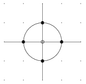 <br/>
(2) Move through the x-axis only in the positive direction <br/>
(3) If $r^2 - x^2$ is a perfect square, then $y$ is an integer. We know $x$ is an integer as well, cause we've started from 1 and we've been increasing it by 1 ever since, thus it only holds integer values. So, $x,y$ are integer values and the equation ${x^2}$ + ${y^2}$ = ${r^2}$ is satisfied, so point $(x,y)$ is a lattice point on the circumference of the circle <br/>
(4) Each time we find such a point, we increase their number 4, not by 1, due to the symmetry we mentioned that rules the circle

In [0]:
class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius

    def calc_latt(self):
        print("Lattice Points of a circle with radius %d and centre %s" % (self.radius,self.center))
        lattice_num = 4
        print("(%d, %d), (%d, %d), (%d, %d), (%d, %d)" % (self.radius, 0, self.radius*(-1), 0, 0 , self.radius, 0, self.radius*(-1)))
        for x in range(1, int(self.radius)):
            y_squared = self.radius**2 - x**2
            y = int(math.sqrt(y_squared))
            if (y**2 == y_squared):
                lattice_num += 4
                print("(%d, %d), (%d, %d), (%d, %d), (%d, %d)" % (x, y, x, -y, -x, y, -x, -y))
        print("Total Lattices :" + str(lattice_num))

def main():
    radius = int(input("Give Radius of Circle (integer): "))
    if radius <= 0:
        print("Invalid input")
    else:
        circle = Circle((0,0), radius)
        circle.calc_latt()

if __name__ == "__main__":
    main()

### Exercise 3: 
##### Implement the incremental 2D algorithm for computing the convex hull of a finite set of points in the plane.
### &&
### Exercise 4: 
##### Implement the gift wrap algorithm for computing the convex hull of a finite set of points in the plane.

##### Solution:
**Convex Hulls**

Suppose we are given a set **S** of points in the plane <br/>
*Intuitively*, the convex hull can be defined by surrounding a collection of points with a rubber band and then letting the rubber
band “snap” *tightly* around the points. The area enclosed by the rubber band is called the convex hull of S <br/>
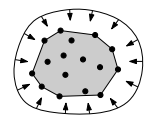 <br/>
*More formally*, the convex hull is the **smallest convex polygon** containing the points of S<br/>
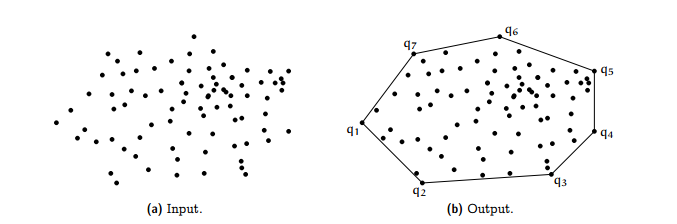 <br/>
<u>Definitions:</u> <br/>
* **polygon**: A region of the plane bounded by a finite number of straight line segments, called <u>edges</u>, connected to form a *closed* polygonal chain or polygonal circuit. Points where two successive edges meet are called <u>vertices</u> <br/>
   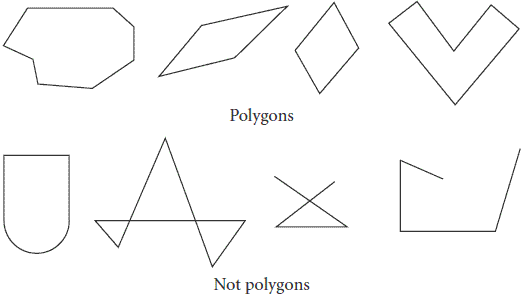
* **convex**: For any two points P and Q inside the polygon, the entire line segment $\overline{PQ}$ lies inside the polygon <br/>
   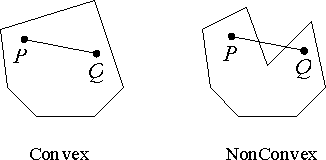
* **smallest**: Any convex proper subset of the convex hull excludes at least one point in S. This implies that every vertex of the convex hull is a point in S (this convex hull has the smallest area and the smallest perimeter of all convex polygons that contain S)

**Convex Hull Problem**

Remember that the Convex Hull of a set of points S is a convex polygon, which means that it is a closed "solid" region that includes all the points in both its boundary and its interior. However, the term is used more loosely in computational geometry to mean the boundary of this region, since it is the boundary that we compute, and that boundary implies the region. Thus, the simplest way to represent the Convex Hull is by **providing its vertices** in clockwise order, starting from any vertex (it doesn’t matter which vertex we choose as the ‘head’ of the list, and our decision to list vertices clockwise instead of counterclockwise is arbitrary)

So, the problem we want to solve is:
Given a set $S=\{p_1,p_2,...,p_n\}$ of points in the plane, calculate a list that contains all points of $S$ that are vertices of the Convex Hull of $S$ (i.e. define the boundary), ordered clockwise <br/>
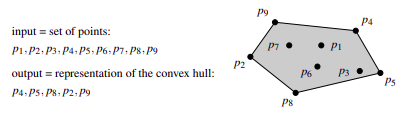

Some well-known 2-D (some of them generalize to higher dimensions) Convex Hull algorithms are:

| Algorithm | Speed | Discovered By |
|:-----------|:-------|:---------------|
| Brute Force | O($n^4$) | [Anon, the dark ages] |
| Gift Wrapping a.k.a Jarvis March | O($n\cdot h$) | [Chand & Kapur, 1970], [Jarvis, 1973] |
| Graham's Scan | O($n\cdot\log{n}$) | [Graham, 1972] |
| QuickHull | O($n\cdot h$) | [Eddy, 1977], [Bykat, 1978] |
| Divide-and-Conquer | O($n\cdot\log{n}$) | [Preparata & Hong, 1977] |
| Monotone Chain a.k.a. Andrew's Algorithm | O($n\cdot\log{n}$) | [Andrew, 1979] |
| Incremental | O($n\cdot\log{n}$) | [Kallay, 1984] |
| Marriage-before-Conquest | O($n\cdot\log{h}$) | [Kirkpatrick & Seidel, 1986] |
| Chan's Algorithm | O($n\cdot\log{h}$) | [Chan, 1996] |

where $\textbf{n}$ = # points in the input set, and $\textbf{h}$ = # vertices on the output hull

For this assignment, we'll consider only the **Graham's Scan** (for the incremental algorithm in Exercise 3) and the **Gift Wrapping/Jarvis March** (for Exercise 4)

**Incremental Algorithms**

Incremental algorithms are algorithms that are based on a common approach for building geometric structures called *incremental construction*. In such algorithms, objects (points, in our case) are added one at a time and the structure (convex hull, in our case) is updated with each new insertion. An important issue with incremental algorithms is the order of insertion. If we were to add points in some arbitrary order, we would need some method of testing whether the newly added point is inside the existing hull. It will simplify things to add points in some appropriately sorted order, in our case, in **increasing order of x-coordinate** (it could be "increasing order of y-coordinate" or a combination of the two if there are points with the same x-coordinate or y-coordinate). In Convex Hull problems, this guarantees that each newly added point is outside the *current* hull

**Graham’s Scan**

This is an *incremental algorithm* for solving the Convex Hull Problem. This means that we will be adding the points in the solution list one by one, and after each insertion we will be updating our current solution accordingly. Our version is a variation of the original Graham's Scan algorithm <br/>
In this algorithm:
* We start by sorting the points in an increasing order of the x-coordinate, which will result in a sequence $p_1,p_2,...,p_n$, according to whom we will be adding the points in our solution list
* At each time, we will be having a list that will represent the *current* (boundary of the) Convex Hull. We start with an empty list, we add our points one by one and, each time we add a point, we update the list according to some property all points in the list must follow (see below). In other words, each time, given the Convex Hull of the points $p_1,p_2,...,p_{i−1}$, we have to compute the Convex Hull of $p_1,p_2,...,p_{i-1},p_i$
* Since we are working from left to right, it would be convenient if the Convex Hull vertices were also ordered from left to right as they occur along the boundary, but this is not the case. Thus, to make matters a bit simpler, we will compute the boundary of the convex hull as two parts:
    * The **Upper Hull**: In a first scan of the points -*left to right*-, we will be adding to the solution list starting from the leftmost point $p_1$ (lowest x-coordinate) up to the rightmost point $p_n$ (highest x-coordinate), computing only those convex hull vertices on the upper boundary of the Convex Hull
    * The **Lower Hull**: In a second scan of the points -*right to left*-, we will be adding to the solution list starting from the rightmost point $p_n$ (highest x-coordinate) up to the leftmost point $p_1$ (lowest x-coordinate), computing only those convex hull vertices on the lower boundary of the Convex Hull <br/>
    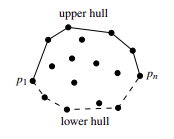
    * And then we will append the Lower Hull to the Upper Hull, hence constructing the whole (boundary of the) Convex Hull
* Each time we add a point $p_i$, either to the Upper Hull or to the Lower Hull, that point should indeed correctly be in the *current* boundary of the Convex Hull, because our points are sorted in an increasing order of the x-coordinate, thus this new point $p_i$ is the rightmost point of the ones added so far (so it is definitely in the boundary so far -maybe later it won't be-). So now we have to compute the Convex Hull of the *new* list (with the new point $p_i$ added)
* Computing the Convex Hull of a single point is trivial, we just return that point. Computing the Convex Hull of two points is also trivial. When computing, however, the Convex Hull of three points, there are 2 different posibilities:
    * either the points are listed in a *clockwise* order
    * or in a *counterclockwise* order
* Imagine we are walking around the boundary of a polygon in clockwise order, adding points in a left-to-right order and making a turn at every vertex. If the triple $\{p_{i-2},p_{i-1},p_i\}$ -*in that particular order*- is in clockwise order it forms a **right turn**, whereas if it is in counterclockwise order it forms a **left turn**. For an arbitrary polygon any turn we take can be either right or left, <u>but for a convex polygon every turn <b>must</b> be a right turn</u> <br/> &emsp;&emsp;**Turning and Orientation** <br/> Given three points $\{p,q,r\}$ -*in that particular order*-, we say that they have a *positive orientation* if they define a counterclockwise oriented triangle -left turn- (a), a *negative orientation* if they define a clockwise oriented triangle -right turn- (b), and zero orientation if they are collinear (c), which includes the case where two or more of the points are identical as well <br/> 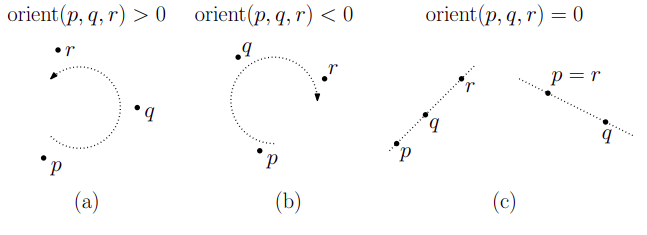 <br/> Orientation is formally defined as the sign of the determinant of the points given in homogeneous coordinates, that is, by prepending a 1 to each coordinate <br/> 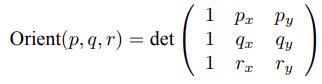 <br/> Thus, finding out whether the points $\{p,q,r\}$ are making a left turn or a right turn is a simple calculation of a determinant. This orientation test computes on which side (half-plane) of the line $\overline{pq}$ the point $r$ lies, and the concept of *turn* is an equivalent way to look at this. So, if the points are oriented counterclockwise ($det>0$) they make a left turn, whereas if they are oriented clockwise ($det<0$) they make a right turn. If the concept of clockwise $\equiv$ right turn and counterclockwise $\equiv$ left turn is puzzling you, imagine you're *drifting* with the car from point $p$ to point $r$ (through point $q$). In figure (a), you'd be turning the steering wheel to the left, whereas in figure (b), you'd be turning it to the right <br/> <span style="color:red">NOTE! </span> The orientation depends on the order in which the points are given. In our case, we consider the last three points of our list this way $\{p_{i-2},p_{i-1},p_i\}$, thus we want them to form a right turn (clockwise). However, if we were to consider them like this $\{p_{i},p_{i-1},p_{i-2}\}$, we would want them to form a left turn (counterclockwise), see why in the figures below <br/> <span style="color:red">NOTE! </span> The idea of a left/right turn is quite obsolete. We could just be talking about clockwise and counterclockwise oriented points, but since you might encounter this concept of a "right/left turn" in some resources, we wanted to make you familiar with it and clear up things a little bit by showing its equivalency to clockwise/counterclockwise orientation <br/>
* So, every time we add a point in either the Upper Hull or the Lower Hull, if our *current* list of vertices contains more than two points, we check whether the last three points $\{p_{i-2},p_{i-1},p_i\}$ make a **right turn**. If this is the case, there is nothing more to do (we proceed to the next point). However, if they don't make a right turn, we can infer that the middle point of the triple ($p_{i-1}$) cannot be on the on the boundary (<u>because the line segment</u> &emsp;$\overline{p_{i-2}p_i}$&emsp; <u>wouldn't lie entirely inside the polygon, hence making this polygon non-convex</u>), so we remove it from the list. We repeat this process until the last three points make a right turn, or until there are only two points left <br/> 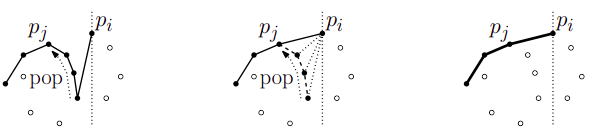 <br/> In the figures, we can see that when we add $p_i$ to the our list of vertices (Upper Hull), the last (according to their x-coordinate) three points $\{p_{i-2},p_{i-1},p_i\}$ are forming a left turn (counterclockwise) which makes the polygon non-convex (because a line segment from $p_{i-2}$ to $p_{i}$ wouldn't lie entirely inside the polygon), so we remove $p_{i-1}$ from our list of vertices. But, the last three points still don't from a right turn. We pop the middle point two more times and, finally, the last three points form a right turn (which makes the polygon convex) <br/>

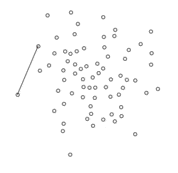 <br/>

We can see that we visit all points from left to right (increasing order of the x-coordinate). Whenever we encounter a new point, we update our *current* list and sometimes points that were previously on the list are getting popped (if they end up in the interior of the Convex Hull due to the new addition). We first compute the Upper Hull (which becomes green when we finish computing it) and then visit all the points again in the reverse order to compute the Lower Hull<br/>

**Pseudocode**

*Algorithm*: ConvexHullGrahamScan(S) <br/> 
Input: A set $S$ of points in the plane <br/> 
Output: A list containing the vertices of the Convex Hull of $S$ in clockwise order

1. &emsp;Sort the points by x-coordinate, resulting in a sequence $p_1,p_2...,p_n$.
2. &emsp;Put the points $p_1$ and $p_2$ in a list $L_{upper}$, with $p_1$ as the first point
3. &emsp;**for** $i$ ← 3 **to** $n$
4. &emsp;&emsp;Append $p_i$ to $L_{upper}$
5. &emsp;&emsp;**while** $L_{upper}$ contains more than two points **and** the last three points in $L_{upper}$ do **not** make a *right turn*
6. &emsp;&emsp;&emsp;Delete the middle of the last three points from $L_{upper}$
7. &emsp;Put the points $p_n$ and $p_{n−1}$ in a list $L_{lower}$, with $p_n$ as the first point
8. &emsp;**for** $i$ ← $n−2$ **down-to** 1
9. &emsp;&emsp;Append $p_i$ to $L_{lower}$
10. &emsp;&emsp;**while** $L_{lower}$ contains more than 2 points **and** the last three points in $L_{lower}$ do **not** make a *right turn*
11. &emsp;&emsp;&emsp;Delete the middle of the last three points from $L_{lower}$
12. &emsp;Remove the first and the last point from $L_{lower}$ to avoid duplication of the points where the Upper and Lower Hull meet
13. &emsp;Append $L_{lower}$ to $L_{upper}$, and call the resulting list $L$.
14. &emsp;return $L$

**Comments on Steps**

(1) To avoid ordering errors, due to the appearance of two points with the same x-coordinate, we can order the points **lexicographically**. This means that we first sort by the x-coordinate, and points with the same x-coordinate are then sorted by their y-coordinate <br/>
(2)(7) We can already put $p_1$,$p_2$ inside $L_{upper}$ and $p_n$,$p_{n−1}$ inside $L_{lower}$, because computing the Convex Hull of one and two points is trivial <br/>
(3) We visit ALL points in the sorted set in the order $p_1,p_2...,p_n$ <br/>
(4)(9) We can append $p_i$ inside the list without any condition yet, because at the current moment, since points are ordered, $p_i$ is definitely outside the *current* boundary of the Convex Hull (so it should be a vertex **for now**)<br/>
(5)(10) To handle the cases of **collinear** and **identical** points, in which the determinant would be 0, we should implement a function that returns true only if the three last points make a right turn (determinant<0), and false in all other cases <br/>
&emsp;&emsp;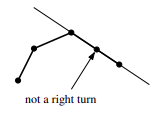<br/>
(8) We visit ALL points in the sorted set in reverse order $p_n,...,p_2,p_1$ <br/>

<span style="color:red">NOTE! </span> Instead of computing the Upper and Lower Hull by visiting the points in two different orders, i.e. first visit the points in $p_1,p_2,...,p_{n}$ order and then visit them in $p_n,p_{n-1},...,p_1$ order, and accepting only right turns, we could visit the points twice in the same order e.g. $p_1,p_2,...,p_{n}$ and the first time accept right turns and the second time accept left turns. This is the same as the first approach, since, as we mentioned, the orientation depends on the order of the points, so when we reverse the order of the points in the first approach, accepting right turns in $p_n,p_{n-1},...,p_1$ is like accepting left turns in $p_1,p_2,...,p_{n}$. However, the second approach would require more code to implement (since we would have to define both turns), whereas in the first approach -which we follow- we only reverse a list and execute the same code on it

**Gift Wrapping / Jarvis March**

Perhaps the simplest algorithm for computing convex hulls simply simulates the process of wrapping a piece of string around the points. This algorithm is usually called *Jarvis’ March*, but it is also referred to as the *Gift-Wrapping* algorithm. We can think of the algorithm as a variant of the sorting algorithm called SelectionSort, which repeatedly finds the next element to add to the sorted order from the remaining items. Similarly, here, we operate by considering any one point, in set S, that is *definitely* on the boundary of the Convex Hull (e.g. the leftmost or the lowest point) and put it in our list of vertices. We then repeatedly add to the list the next vertex, which is chosen according to some properties (see below) it must satisfy to really be a vertex of the Convex Hull<br/>
In this algorithm:
* We find the **leftmost** (lexicographically, as in Graham's Scan) point, and assign it to $p$. Since it is definitely a vertex, we put it in our list of vertices
* Then, we pick an arbitrary point $q$, let's say the first point in the set, to be a **candidate** (not yet approved) vertex and consider the line $\overline{pq}$
* Now **for each** point $r$ in the set (we visit all of them), we check if it lies on the right or the left side of line $\overline{pq}$ (*Remember: This translates to a right turn -clockwise- and a left turn -counterclockwise-, respectively, when we consider the triple $\{p,q,r\}$ in that order*):
    * If it lies on the right side, it means that it lies on the *current* interior of the Convex Hull, so it can't be a candidate vertex for now. Thus, we move to the next point in our set
    * If it lies on the left side, it means that it is ouside the *current* boundary of the Convex Hull, so it should probably be a candidate vertex. Thus, we change $q$ to be this point $r$, reconsider the line $\overline{pq}$ (because we changed our $q$) and move on to the next point $r$ in our set to check if it lies on the left or right side of $\overline{pq}$ (i.e. if it is even further outside the boundary or inside the *current* interior, respectively)
* After we've visited **all** the points in the set, our point $q$ will be such that **every** other point lies on the right side of line $\overline{pq}$ (i.e. on the interior of the *current* Convex Hull), so point $q$ is approved as a vertex and $\overline{pq}$ is, indeed, a side of the Convex Hull (*Note, when we say the point lies on the right side of the line, we should clarify that we mean <u> the points are oriented clockwise</u>, because the concept of lying left or right of a line becomes quite puzzling optically in some cases if you don't consider the order $\{p,q,r\}$*). Now we put $q$ inside the list of vertices
* Now we change our starting point $p$ to be the vertex $q$ we just put in the list and repeatedly check again if the points in the set lie on the right or left side of the **new** line $\overline{pq}$ (with $q$ being initiated to the first point of the set again). We repeat this process until we put the **leftmost** point again in the list of vertices, which would mean that we've "wrapped-up the whole gift" from top to bottom <br/>

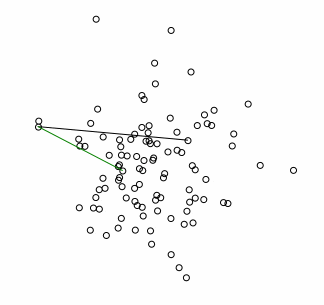 <br/>

The grey line represents line $\overline{pq}$. Each time we visit all the remaining points $r$ in the set and check if they are on the left side of the line. If a point is on the left side, then it becomes $q$ and now the grey line is redrawn according to that point, if we find another point that is further to the left of the new line, the grey line gets redrawn again and so on. These grey lines represent the sides of the convex hull and with each iteration they are pushed as further to the left as possible

**Pseudocode**

*Algorithm*: ConvexHullGiftWrapping(S) <br/> 
Input: A set $S$ of points in the plane <br/> 
Output: A list containing the vertices of the Convex Hull of $S$ in clockwise order

1. &emsp;Find the leftmost point $l$ in the set
2. &emsp;$p←l$
3. &emsp;**Do**
4. &emsp;&emsp;Append $p$ to *Vertices*
5. &emsp;&emsp;Initialize $q$ to the first point of S 
6. &emsp;&emsp;**for each** point $r$ inside S
7. &emsp;&emsp;&emsp;**if** $q==p$ **or** $r$ is on the left side of the line $\overline{pq}$ **then**
8. &emsp;&emsp;&emsp;&emsp;$q←r$
9. &emsp;&emsp;$p←q$
10. &emsp;**While** ($q\neq l$)

**Comments on Steps**

*Remember: $p$ is the last **approved** vertex, $q$ is the current **candidate** vertex and $r$ is the point of S for which we're checking whether it lies on the left or right side of $\overline{pq}$* <br/>
(2) Our starting point is one that is definitely a vertex and since $l$ is the leftmost point, we start from there <br/>
(4) Each time we append a point to the *Vertices* list, we're approving it of being a vertex of the **actual** boundary of the Convex Hull, not just the *current* Convex Hull (not a candidate anymore, Yay!)  <br/>
(7) The way this pseudocode is organized, there are cases where our program wouldn't behave correctly (e.g. loop forever or not check all the points) hadn't we put this condition "$q$ == $p$". For example, when the leftmost point is the first point of the set, $p$ and $q$ would hold the same point in the beginning, the leftmost. This means that we would visit all the points $r$ in the set once, but non of them would make a left turn, since $q==p\Rightarrow$ orient$\{p,q,r\}=0$. So $q$ wouldn't change at all after visiting all $r$ points and then we would see that $q=l$ and the program would stop there, without checking for any other vertices. By assigning $q←r$ when $q==p$, we move $q$ away from $p$, hence making it possible to discover left turns in the next iterations. We don't care about how valid of a vertex $r$ is at that point, cause if there is a better candidate, we're going to find it in the next iterations. We just wanted a little push off that peculiar case <br/>
(8) If there is a better "candidate" for being a vertex we change our $q$ to that point<br/>
(9) We repeat this process with $q$ now that we know for sure that this is a legit vertex <br/>
(10) We repeat this process until we come up with an approved vertex that is actually our starting point, leftmost point $l$

Since the algorithm spends $O(n)$ time for each convex hull vertex, the worst-case running time is $O(n^2)$. However, this naïve analysis hides the fact that if the convex hull has very few vertices, Jarvis’ march is extremely fast. A better way to write the running time is $O(n\cdot h)$, where $h$ is the number of convex hull vertices. In the worst case, $h = n$, and we get our old $O(n^2)$ time bound, but in the best case $h = 3$, and the algorithm only needs $O(n)$ time. In computational geometry we call this an *output-sensitive* algorithm; the smaller the output, the faster the algorithm

<span style="color:red">NOTE! </span> It doesn't matter whether we check (in step7) for a left turn (counterclockwise) or a right turn (clockwise) for the points $\{p,q,r\}$. When we search for a left turn (as in our pseudocode), we're building the boundary of the Convex Hull from top to bottom (as in the GIF image), whereas if we were searching for a right turn we'd be building it bottom-up (since every point furthest to the right of a line would be a vertex). The key here is to be consistent in searching for only one type of *turn* throughout the execution, in order to find the outermost points in each case and leave all the others in the interior

In [0]:
class PointsSet2D:
    def __init__(self,points):
        self.points = points

    def get(self): #return the points of the set
        return self.points

    def sort_points(self): #returns the points sorted lexicographically (first by x-coordinate, then by y-coordinate)
        sorted_points = sorted(self.points, key=lambda tup: (tup[0],tup[1])) #"sorted" returns a list of the points sorted
        return tuple(sorted_points) #convert back to tuple and return

    def turn(self,p,q,r,turn): #checks if three points p,q,r (in this order) form the requested turn
        matrix = np.matrix([[1,p[0],p[1]],[1,q[0],q[1]],[1,r[0],r[1]]]) #create the matrix of the points given in homogeneous coordinates
        if turn == "right": #check if the points make a right turn
            return np.linalg.det(matrix)<0 #true if determinant<0 (i.e. the points are oriented clockwise), false otherwise
        elif turn == "left": #check if the points make a left turn
            return np.linalg.det(matrix)>0 #true if determinant>0 (i.e. the points are oriented counterclockwise), false otherwise

    def convex_hull_graham_scan(self):
        points = self.sort_points() #points ordered lexicographically
        upperHull = [] # a list that holds the vertices on the upper boundary of the convex hull
        for point in points: #visit all the points in order p1,p2,...,pn
            upperHull.append(point)
            while len(upperHull)>2 and not(self.turn(upperHull[-3],upperHull[-2],upperHull[-1],"right")): #step5
                upperHull.pop(-2) #remove the middle of three last points in our list
        lowerHull = [] # a list that holds the vertices on the lower boundary of the convex hull
        for point in reversed(points): #do the exact same thing as before, but visit the points in the reverse order, i.e. pn,...,p2,p1
            lowerHull.append(point)
            while len(lowerHull)>2 and not(self.turn(lowerHull[-3],lowerHull[-2],lowerHull[-1],"right")): #step10
                lowerHull.pop(-2)
        lowerHull.pop(0) #remove the first item of the lower hull (step12)
        lowerHull.pop(-1) #remove the last item of the lower hull (step12)
        convexHull = upperHull + lowerHull
        self.plot(convexHull)

    #we could have used the "sort_points" function to find the leftmost point, but this would ruin the time complexity of the Gift Wrapping    algorithm, since sorting has a lower bound of O(nlogn) and we can find the leftmost without sorting the points in O(n)
    def find_leftmost(self):
        leftmost = self.points[0]
        for point in self.points:
            if point[0] < leftmost[0]: #check for x-coordinate
                leftmost = point
            elif point[0] == leftmost[0]: #if x-coordinate is the same, check for y-coordinate
                if point[1] > leftmost[1]:
                    leftmost = point
        return leftmost

    def convex_hull_gift_wrapping(self):
        vertices = []
        leftmost = self.find_leftmost()
        p = leftmost
        while True:
            vertices.append(p)
            q = self.points[0]
            for r in self.points:
                if q == p or self.turn(p,q,r,"left"):
                    q = r
            p = q
            if q == leftmost:
                break
        self.plot(vertices)

    def plot(self,vertices): # plot all the points and boundary of the convex hull (vertices)
        # plot all points
        allX = [point[0] for point in self.points]
        allY = [point[1] for point in self.points]
        plt.scatter(allX, allY, c='black')

        # plot the vertices
        vertX = [point[0] for point in vertices]
        vertY = [point[1] for point in vertices]
        # add the first point again in the list to be able to connect (in the plot) the last point with the first
        vertX.append(vertices[0][0])
        vertY.append(vertices[0][1])
        plt.scatter(vertX, vertY,c='red')
        plt.plot(vertX, vertY, "k-")
        plt.title('Interior of Convex Hull: Black - Boundary/Vertices of Convex Hull: Red')
        plt.show()


def get_input():
    print("How would you like to input points? Type only the number inside the parentheses: \n (1) Autogenerate \n (2) Enter points myself ")
    option = int(input())
    if option == 1:
        numOfpoints = int(input("How many points do you want to autogenerate?: "))
        #generate random points with x,y coordinates ranging from -1000 to 1000 (can change this), both integers and floats (3 decimal places)
        points = tuple([ (round(np.random.uniform(-1000, 1000),3),round(np.random.randint(-1000, 1000),3)) for i in range(numOfpoints)])
    else:
        print("The input points should be in the form (x1,y1),(x2,y2),...(xn,yn) with the parentheses included! -works with floating point coordinates as well-")
        points = ast.literal_eval(input('Enter all the points at once:'))
    if len(points)<20:
        print("Points generated: %s" % list(points))
    else:
        print("Points generated: Too many to print. We'll just plot them!")
    return PointsSet2D(points)


def main():
    try:
        points = get_input()
    except:
        print("Error on points input. Please check your input. An example of input is: (1,2.52),(2,4),(5,9.2),(3,8.1)")
    print("How would you like to compute the Convex Hull? Type only the number inside the parentheses:\n (1) Incremental - Graham's Scan \n (2) Gift Wrapping / Jarvis March")
    option = int(input())
    if option == 1:
        vertices = points.convex_hull_graham_scan()
    else:
        vertices = points.convex_hull_gift_wrapping()

if __name__ == "__main__":
    main()